In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [ ]:
x.head()


0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

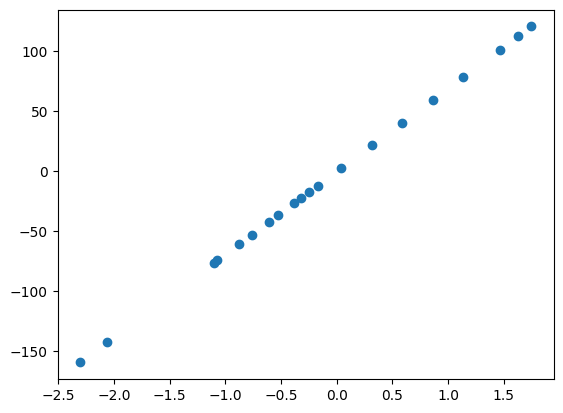

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return np.sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def fit(self, X, Y, alpha=0.001, accuracy=0.000001, max_steps=5000):
        steps, errors = [], []
        step = 0
        prev_err = self.error(X, Y)

        for step in range(max_steps):
            dJ0 = np.sum(self.predict(X) - Y) / len(X)
            dJ1 = np.sum((self.predict(X) - Y) * X) / len(X)

            # Адаптивная скорость обучения
            while True:
                self.b0_temp = self.b0 - alpha * dJ0
                self.b1_temp = self.b1 - alpha * dJ1
                new_err = self.error(X, Y)

                if new_err < prev_err:
                    break
                else:
                    alpha /= 2
                    self.b0_temp = self.b0
                    self.b1_temp = self.b1

            self.b0 = self.b0_temp
            self.b1 = self.b1_temp
            steps.append(step)
            errors.append(new_err)

            # Проверка сходимости
            if abs(new_err - prev_err) < accuracy:
                break
            prev_err = new_err

        return steps, errors

    def plot(self, X, Y):
        plt.scatter(X, Y, label='Data')
        plt.plot(X, self.predict(X), color='red', label='Regression Line')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()






In [ ]:
import numpy as np

# Создаем простые данные
X = np.array([1, 2, 3, 4, 5])
Y = 2 * X + 1

# Инициализируем модель
model = Model()

# Обучаем модель с быстрыми параметрами
steps, errors = model.fit(X, Y, alpha=0.1, max_steps=1000)

# Выводим параметры модели
print("Параметры модели:")
print("b0:", model.b0)
print("b1:", model.b1)


# Построим график
model.plot(X, Y)

# Выведем график изменения ошибки на каждом шаге обучения
plt.plot(steps, errors)
plt.xlabel("Шаги")
plt.ylabel("Ошибка")
plt.title("График изменения ошибки на каждом шаге обучения")
plt.show()

